In [751]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Описание датасета

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Пути к директориям и файлам**

In [752]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'

**Загрузка данных**

In [753]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)

df_test = pd.read_csv(TEST_DATASET_PATH)

df_train.shape, df_test.shape

((7500, 17), (2500, 16))

In [754]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [755]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [756]:
df_train.select_dtypes(include=['object'])

,Home Ownership,Years in current job,Purpose,Term
0,Own Home,NaN,debt consolidation,Short Term
1,Own Home,10+ years,debt consolidation,Long Term
2,Home Mortgage,8 years,debt consolidation,Short Term
3,Own Home,6 years,debt consolidation,Short Term
4,Rent,8 years,debt consolidation,Short Term
...,...,...,...,...
7495,Rent,< 1 year,other,Short Term
7496,Home Mortgage,1 year,debt consolidation,Long Term
7497,Rent,6 years,buy a car,Short Term
7498,Home Mortgage,NaN,debt consolidation,Short Term






# Уменьшение объема памяти датасета

In [757]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col]. astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                       
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                       df[col] = df[col].astype(np.float32)
                else:
                       df[col] = df[col].astype(np.float64)

    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:1f}%'.format(100 * (start_mem - end_mem) / start_mem))
                       
    return df

In [758]:
reduce_mem_usage(df_train)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.58 MB
Decreased by 40.436102%


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.299999,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,100000000.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.300000,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.000000,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.500000,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.600000,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.500000,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.500000,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.099998,1778920.0,0.0,NaN,0.0,buy a car,Short Term,100000000.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.500000,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


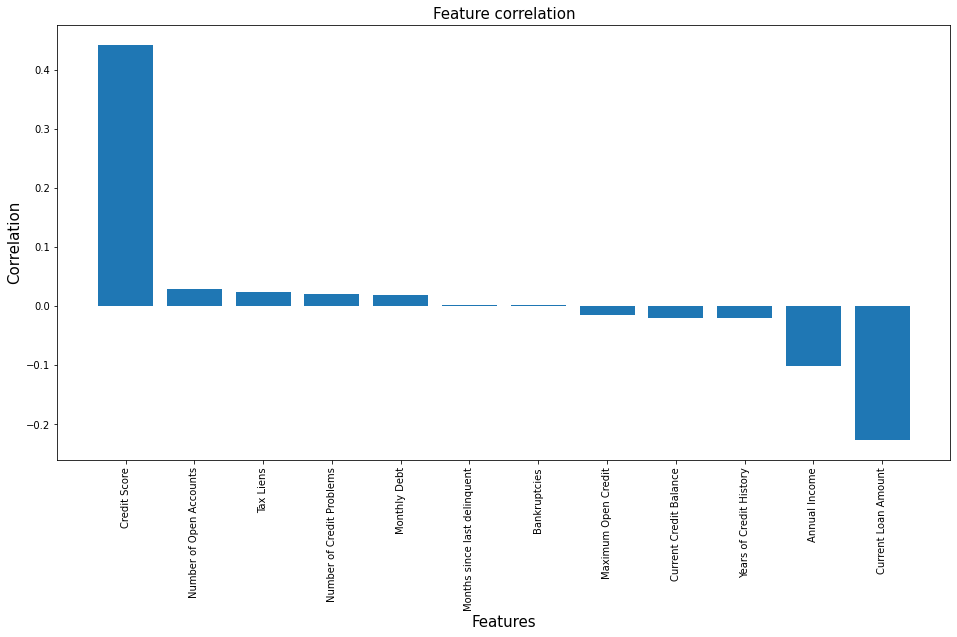

In [759]:
correlation = df_train.corrwith(df_train['Credit Default']).sort_values(ascending=False)
correlation.drop('Credit Default', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature correlation', fontsize=15)
plt.show()

<AxesSubplot:>

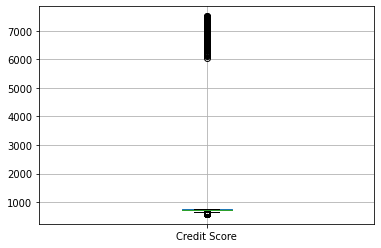

In [760]:
df_train.boxplot(['Credit Score'])



# Обработка данных



### *Home Ownership*

In [761]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [762]:
df_train.loc[df_train['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

In [763]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3649
Rent             3204
Own Home          647
Name: Home Ownership, dtype: int64

In [764]:
df_train = pd.get_dummies(df_train, columns=['Home Ownership'])

In [765]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
6319,1258712.0,5 years,0.0,6.0,16.799999,322960.0,0.0,NaN,0.0,debt consolidation,Short Term,152482.0,143355.0,15944.0,749.0,0,1,0,0
7277,1791472.0,10+ years,0.0,23.0,26.700001,1111572.0,0.0,59.0,0.0,home improvements,Long Term,100000000.0,209285.0,45384.0,728.0,0,1,0,0


### *Annual income*

In [766]:
df_train.corr()['Annual Income']

Annual Income                   1.000000
Tax Liens                       0.066245
Number of Open Accounts         0.188524
Years of Credit History         0.186531
Maximum Open Credit             0.062218
Number of Credit Problems      -0.015407
Months since last delinquent   -0.101787
Bankruptcies                   -0.066877
Current Loan Amount             0.032082
Current Credit Balance          0.386481
Monthly Debt                    0.584819
Credit Score                   -0.037832
Credit Default                 -0.101375
Home Ownership_Home Mortgage    0.222966
Home Ownership_Own Home        -0.070768
Home Ownership_Rent            -0.185264
Name: Annual Income, dtype: float64

In [767]:
df_train['Annual Income NaN'] = 0
df_train.loc[df_train['Annual Income'].isna(), 'Annual Income NaN'] = 1
df_train['Annual Income'].fillna(df_train['Annual Income'].median(), inplace=True)

In [768]:
df_train['Annual Income'].value_counts()

1168386.0    1558
1161660.0       4
1058376.0       4
1043651.0       4
969475.0        4
             ... 
1272316.0       1
712082.0        1
695476.0        1
678889.0        1
402192.0        1
Name: Annual Income, Length: 5478, dtype: int64

In [769]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Annual Income NaN
867,1312577.0,5 years,0.0,11.0,11.4,730730.0,0.0,NaN,0.0,debt consolidation,Short Term,587004.0,321214.0,21986.0,723.0,0,1,0,0,0
6572,1155257.0,6 years,0.0,9.0,24.5,1236950.0,0.0,3.0,0.0,debt consolidation,Short Term,100000000.0,327959.0,9030.0,738.0,0,1,0,0,0


### *Years in current job*

In [770]:
df_train['Years in current job NaN'] = 0
df_train.loc[df_train['Annual Income'].isna(), 'Years in current job NaN'] = 1
years_mode = df_train['Years in current job'].mode()[0]
years_mode

'10+ years'

In [771]:
df_train['Years in current job'].fillna(years_mode, inplace=True)

In [772]:
df_train['Years in current job'].value_counts()

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [773]:
years_to_numbers = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
              '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
             '8 years': 8, '9 years': 9, '10+ years': 10}

In [774]:
df_train['Years in current job'].replace(years_to_numbers, inplace=True)

In [775]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Annual Income NaN,Years in current job NaN
5923,573135.0,10,0.0,15.0,16.6,476564.0,0.0,10.0,0.0,other,...,237798.0,46930.0,6400.0,719.0,1,1,0,0,0,0
4736,3153810.0,10,0.0,12.0,32.0,166100.0,0.0,6.0,0.0,debt consolidation,...,110660.0,77026.0,36794.0,721.0,0,0,0,1,0,0


### *Maximum Open Credit*

<AxesSubplot:>

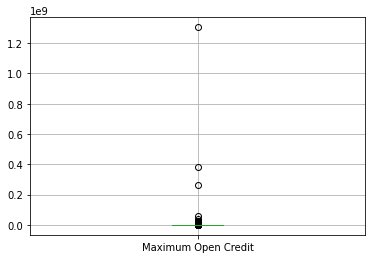

In [776]:
df_train.boxplot('Maximum Open Credit')

In [777]:
df_train.loc[(df_train['Maximum Open Credit'] > 0.7 * 10**7), 'Credit Default'].value_counts()

0    30
Name: Credit Default, dtype: int64

In [778]:
df_train.loc[(df_train['Maximum Open Credit'] > 0.7 * 10**7), 'Maximum Open Credit'] = df_train['Maximum Open Credit'].median()

### *Months since last delinquent*

In [779]:
df_train['Months since last delinquent'].value_counts()

14.0     76
29.0     71
33.0     68
8.0      68
12.0     65
         ..
86.0      1
118.0     1
84.0      1
91.0      1
92.0      1
Name: Months since last delinquent, Length: 89, dtype: int64

In [780]:
df_train['Months since last delinquent'].describe()

count    3419.000000
mean       34.692600
std        21.688807
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

In [781]:
df_train['Months since last delinquent NaN'] = 0
df_train.loc[df_train['Months since last delinquent'].isna(), 'Months since last delinquent NaN'] = 1
df_train['Months since last delinquent'].fillna(df_train['Months since last delinquent'].median(), inplace=True)

In [782]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Annual Income                     7500 non-null   float32
 1   Years in current job              7500 non-null   int64  
 2   Tax Liens                         7500 non-null   float32
 3   Number of Open Accounts           7500 non-null   float32
 4   Years of Credit History           7500 non-null   float32
 5   Maximum Open Credit               7500 non-null   float32
 6   Number of Credit Problems         7500 non-null   float32
 7   Months since last delinquent      7500 non-null   float32
 8   Bankruptcies                      7486 non-null   float32
 9   Purpose                           7500 non-null   object 
 10  Term                              7500 non-null   object 
 11  Current Loan Amount               7500 non-null   float32
 12  Curren

### *Bankruptcies*

In [783]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [784]:
df_train.corr()['Bankruptcies']

Annual Income                      -0.059506
Years in current job                0.074352
Tax Liens                           0.057360
Number of Open Accounts            -0.019130
Years of Credit History             0.085699
Maximum Open Credit                -0.134799
Number of Credit Problems           0.730751
Months since last delinquent        0.109507
Bankruptcies                        1.000000
Current Loan Amount                -0.005987
Current Credit Balance             -0.142849
Monthly Debt                       -0.079579
Credit Score                       -0.027488
Credit Default                      0.001648
Home Ownership_Home Mortgage       -0.006354
Home Ownership_Own Home            -0.006101
Home Ownership_Rent                 0.009879
Annual Income NaN                  -0.004905
Years in current job NaN                 NaN
Months since last delinquent NaN    0.004561
Name: Bankruptcies, dtype: float64

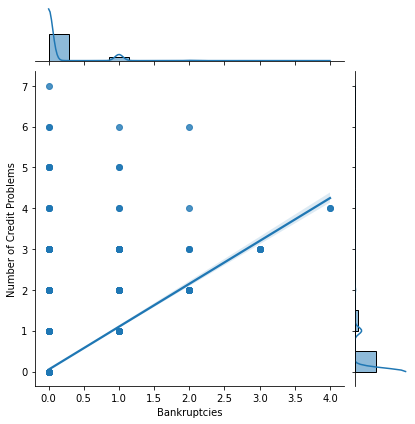

In [785]:
grid = sns.jointplot(x=df_train.loc[df_train['Bankruptcies'] >= 0, 'Bankruptcies'], y=df_train['Number of Credit Problems'], kind='reg')

plt.show()

In [786]:
df_train['Bankruptcies NaN'] = 0
df_train.loc[df_train['Bankruptcies'].isna(), 'Bankruptcies NaN'] = 1
df_train['Bankruptcies'].fillna(df_train['Number of Credit Problems'], inplace=True)

In [787]:
df_train.loc[df_train['Number of Credit Problems'] == df_train['Bankruptcies'], ['Number of Credit Problems', 'Bankruptcies']]

,Number of Credit Problems,Bankruptcies
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
5,0.0,0.0
...,...,...
7495,0.0,0.0
7496,0.0,0.0
7497,0.0,0.0
7498,0.0,0.0


### *Purpose*

In [788]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [789]:
df_train.loc[(df_train['Purpose'] != 'debt consolidation') & (df_train['Purpose'] != 'home improvements'), 'Purpose'] = 'other'

In [790]:
df_train['Purpose'].value_counts()

debt consolidation    5944
other                 1144
home improvements      412
Name: Purpose, dtype: int64

In [791]:
df_train = pd.get_dummies(df_train, columns=['Purpose'])

In [792]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,...,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Annual Income NaN,Years in current job NaN,Months since last delinquent NaN,Bankruptcies NaN,Purpose_debt consolidation,Purpose_home improvements,Purpose_other
6260,1168386.0,5,0.0,23.0,21.6,513964.0,0.0,45.0,0.0,Short Term,...,0,0,1,1,0,0,0,0,0,1
6374,2126290.0,8,0.0,19.0,16.9,1301894.0,0.0,16.0,0.0,Short Term,...,1,0,0,0,0,0,0,1,0,0


### *Term*

In [793]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [794]:
df_train = pd.get_dummies(df_train, columns=['Term'])

In [795]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Home Ownership_Rent,Annual Income NaN,Years in current job NaN,Months since last delinquent NaN,Bankruptcies NaN,Purpose_debt consolidation,Purpose_home improvements,Purpose_other,Term_Long Term,Term_Short Term
1334,1841157.0,7,0.0,17.0,24.5,1876644.0,0.0,20.0,0.0,100000000.0,...,0,0,0,0,0,1,0,0,0,1
1869,1400072.0,10,0.0,14.0,27.6,820556.0,1.0,23.0,1.0,77814.0,...,0,0,0,0,0,1,0,0,0,1


### *Current Loan Amount*

<AxesSubplot:>

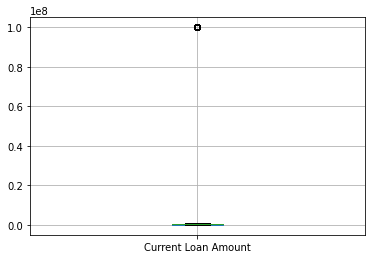

In [796]:
df_train.boxplot(column='Current Loan Amount')

In [797]:
df_train['Current Loan Amount'].quantile(0.95)

100000000.0

In [798]:
condition = df_train['Current Loan Amount'] >= 10**7

In [799]:
df_train.loc[condition, 'Current Loan Amount'] = df_train['Current Loan Amount'].median()

### Credit Score (пропуски и выбросы)

In [800]:
df_train['Credit Score'].describe()

count    5943.000000
mean     1151.087524
std      1604.451416
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

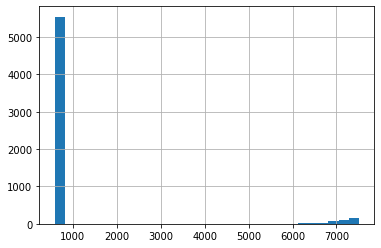

In [801]:
df_train['Credit Score'].hist(bins=30)

plt.show()

In [802]:
df_train['Credit Score'].quantile(0.995)

7440.0

In [803]:
df_train.loc[(df_train['Credit Score'] > 751), 'Credit Default'].value_counts()

1    400
Name: Credit Default, dtype: int64

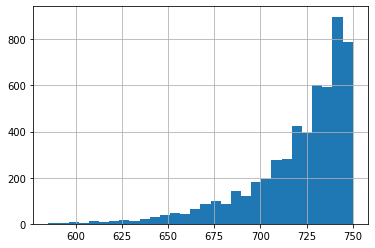

In [804]:
df_train.loc[df_train['Credit Score'] < 751.0, 'Credit Score'].hist(bins=30)
plt.show()

In [805]:
df_train['Credit Score'].min()

585.0

In [806]:
df_train.loc[df_train['Credit Score'] > 751, 'Credit Score'] = df_train['Credit Score'].min()

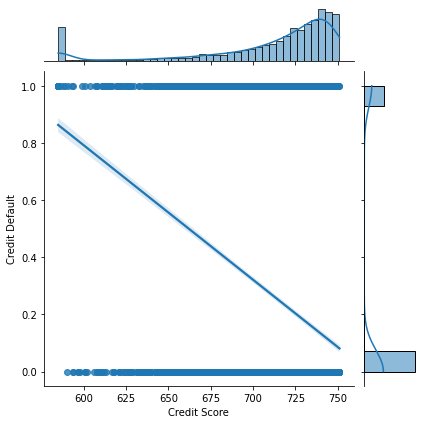

In [807]:
grid = sns.jointplot(x=df_train['Credit Score'], y=df_train['Credit Default'], kind='reg')

plt.show()

In [808]:
df_train.loc[df_train['Credit Score'].isna(), 'Credit Default'].value_counts()

0    1028
1     529
Name: Credit Default, dtype: int64

In [809]:
df_train['Credit Score NaN'] = 0
df_train.loc[df_train['Credit Score'].isna(), 'Credit Score NaN'] = 1
df_train['Credit Score'].fillna(df_train['Credit Score'].median(), inplace=True)

In [810]:
df_train.corr()['Credit Default']

Annual Income                      -0.095203
Years in current job                0.006776
Tax Liens                           0.024368
Number of Open Accounts             0.028884
Years of Credit History            -0.020567
Maximum Open Credit                -0.053757
Number of Credit Problems           0.020088
Months since last delinquent        0.002830
Bankruptcies                        0.001640
Current Loan Amount                 0.064181
Current Credit Balance             -0.019522
Monthly Debt                        0.018480
Credit Score                       -0.387238
Credit Default                      1.000000
Home Ownership_Home Mortgage       -0.065258
Home Ownership_Own Home             0.010260
Home Ownership_Rent                 0.060114
Annual Income NaN                   0.066020
Years in current job NaN                 NaN
Months since last delinquent NaN   -0.011756
Bankruptcies NaN                    0.000383
Purpose_debt consolidation         -0.015075
Purpose_ho

In [904]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

# 3. Модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 4. Метрики качества
from sklearn.metrics import f1_score as f1

In [905]:
X = df_train.drop(columns='Credit Default')

In [906]:
y = df_train['Credit Default']

In [907]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=100)

### Gradient Boosting Classifier

In [932]:
clf = GradientBoostingClassifier(n_estimators=200,
                                 max_depth=4,
                                 min_samples_split=50,
#                                  min_samples_leaf=50,
                                 random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1(y_test, y_pred)

0.41642228739002934

In [933]:
y_pred = clf.predict(X_train)
f1(y_train, y_pred)

0.653214453308306

### Decision Tree Classifier

In [900]:
max_depth_values = np.arange(2, 20)

accuracy_on_test = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value, min_samples_split=5, random_state=42, min_samples_leaf=15,
                             max_leaf_nodes=40)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
        
    acc_test = f1(y_test, y_pred)
    acc_train = f1(y_train, y_pred_train)
    
    if i % 4 == 2:
        print('K = {}'.format(value))
        print('\tf1_test = {}'.format(acc_test))
        print('\tf1_train = {}\n'.format(acc_train))
    
    accuracy_on_test.append(acc_test)
    accuracy_on_train.append(acc_train)

K = 4
	f1_test = 0.40702479338842973
	f1_train = 0.43028720626631856

K = 8
	f1_test = 0.4401826484018265
	f1_train = 0.5452042221202387

K = 12
	f1_test = 0.4496707431796802
	f1_train = 0.5328916232844297

K = 16
	f1_test = 0.4496707431796802
	f1_train = 0.5328916232844297



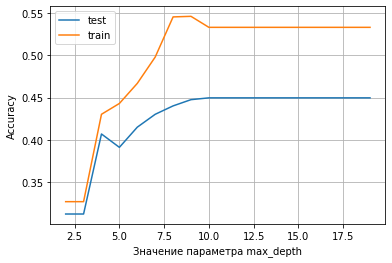

In [901]:
plt.rcParams['figure.figsize'] = 6, 4

plt.plot(max_depth_values, accuracy_on_test, label="test")
plt.plot(max_depth_values, accuracy_on_train, label="train")

plt.xlabel('Значение параметра max_depth')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [897]:
clf = DecisionTreeClassifier(max_depth=10,
                             min_samples_split=5,
                             min_samples_leaf=15,
                             max_leaf_nodes=100,
                             random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1(y_test, y_pred)

0.44778761061946903

In [818]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       clf.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [819]:
feature_importances

,feature_name,importance
12,Credit Score,0.465858
9,Current Loan Amount,0.097709
0,Annual Income,0.090028
11,Monthly Debt,0.084717
23,Term_Long Term,0.072375
5,Maximum Open Credit,0.037386
7,Months since last delinquent,0.034181
4,Years of Credit History,0.032098
10,Current Credit Balance,0.016950
15,Home Ownership_Rent,0.015568


In [891]:
y_pred = clf.predict(df_test)

ValueError: could not convert string to float: 'Rent'

In [892]:
df_test

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0
